In [1]:
from brian2 import * 
%matplotlib inline

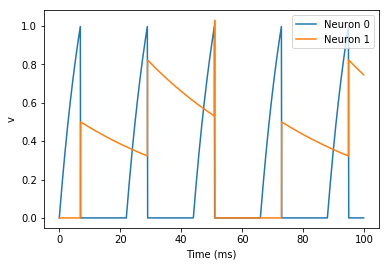

In [20]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1 (unless refractory)
I : 1
tau : second
'''

g = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', refractory='15*ms', method='rk2')
g.I = [2, 0]
g.tau = [10, 50]*ms

s = Synapses(g, g, on_pre='v_post += 0.5')
s.connect(i = 0, j = 1)
#s.connect(i = 1, j = 0)

stateMonitor = StateMonitor(g, 'v', record=True)

run(100*ms)

plot(stateMonitor.t/ms, stateMonitor.v[0], label='Neuron 0')
plot(stateMonitor.t/ms, stateMonitor.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

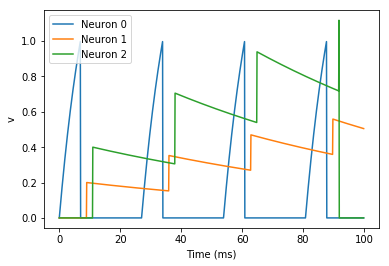

In [34]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1 (unless refractory)
I : 1
tau : second
'''

g = NeuronGroup(3, eqs, threshold='v > 1', reset='v = 0', refractory='20*ms', method='rk2')
g.I = [2, 0, 0]
g.tau = [10, 100, 100]*ms

s = Synapses(g, g, 'w : 1', on_pre='v_post += w')
s.connect(i = 0, j = [1, 2])
s.w = '0.2 * j'
s.delay = 'j * 2*ms'
#s.connect(i = 1, j = 0)

M = StateMonitor(g, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

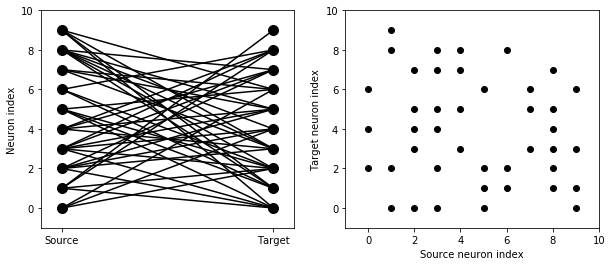

In [40]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')
S = Synapses(G, G)
S.connect(condition='i!=j', p=0.5)

visualise_connectivity(S)

In [36]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
